In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from kneed import KneeLocator
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv('features_final.csv') # uploading dataset 

In [4]:
dataset = dataset[["iata", "iso_country", "seaport_count", 
                   "airport_count", "build_count", "industrial_count", 
                   "tourism_count", "terminal_count", "runways_count", 
                   "name_city_1", "population_city_1", "dist_city_1", 
                   "name_city_2", "population_city_2", "dist_city_2", 
                   "name_city_3", "population_city_3", "dist_city_3", 
                   "population_around", "elevation_ft", "lighted", "max_length_ft", 
                   "width_ft", "aptclass", "apttype", "authority", "humuse", 
                   "natural_dis_risk", "informrisk", "lpi_customs", 
                   "lpi_infrastructure", "gard", "airport_area", "airport_type"]]
dataset

iata iso_country  seaport_count  airport_count  build_count  \
0    AAC          EG              0              2           74   
1    AAE          DZ              0              1           95   
2    AAZ          GT              0              5         2465   
3    ABD          IR              0              2          383   
4    ABS          EG              0              1          101   
..   ...         ...            ...            ...          ...   
966  ZNZ          TZ              0              1        55685   
967  ZOS          CL              0              3          137   
968  ZPC          CL              0              1         4268   
969  ZYL          BD              0              5        12179   
970  ZZU          MW              0              0        42239   

     industrial_count  tourism_count  terminal_count  runways_count  \
0                 276           1362               1              1   
1                 111            237               2              2   
2                  82           1279               2              1   
3                2308            829               1              2   
4                   3             24               0              2   
..                ...            ...             ...            ...   
966              1870           3485               0              1   
967               416           1334               1              2   
968               179           1114               0              1   
969                33            395               1              1   
970                13            105               2              1   

            name_city_1  ...   apttype  authority humuse  natural_dis_risk  \
0                 Arish  ...   Airport      Civil     No               4.9   
1                Annaba  ...   Airport      Civil     No               4.7   
2        Quetzaltenango  ...  Airfield      Civil     No               6.7   
3                Abadan  ...   Airport      Civil     No               6.8   
4            Abu Simbel  ...  Airfield      Civil     No               4.9   
..                  ...  ...       ...        ...    ...               ...   
966       Zanzibar City  ...   Airport      Civil     No               5.1   
967     Osorno Province  ...  Airfield      Civil     No               6.2   
968     Cautín Province  ...  Airstrip      Civil     No               6.2   
969  Sunamganj District  ...   Airport      Civil     No               8.2   
970               Mzuzu  ...   Airport      Civil     No               4.5   

     informrisk lpi_customs  lpi_infrastructure  gard  airport_area  \
0           5.1        2.67                2.91   NaN       3918622   
1           3.9        2.28                2.45   NaN       3726703   
2           5.5        2.35                2.27   NaN        715718   
3           5.0        2.46                2.67   NaN       3501077   
4           5.1        2.67                2.91   NaN       4203655   
..          ...         ...                 ...   ...           ...   
966         5.1        2.66                2.72   NaN       2506390   
967         2.8        3.23                3.09   NaN        935325   
968         2.8        3.23                3.09   NaN        446403   
969         5.8        2.33                2.36   NaN       1986265   
970         4.8        2.58                2.56   NaN        322805   

       airport_type  
0    medium_airport  
1    medium_airport  
2     small_airport  
3    medium_airport  
4    medium_airport  
..              ...  
966   large_airport  
967  medium_airport  
968   small_airport  
969  medium_airport  
970  medium_airport  

[971 rows x 34 columns]

In [5]:
# replacing missing values in population and distance with 0

dataset[["population_city_1", "population_city_2", "population_city_3", "dist_city_1", "dist_city_2", "dist_city_3"]] = dataset[["population_city_1", "population_city_2", "population_city_3", "dist_city_1", "dist_city_2", "dist_city_3"]].fillna(0)

In [6]:
# replacing empty fields 

dataset["lighted"] = dataset["lighted"].fillna(0)
dataset['apttype'] = dataset['apttype'].fillna("Unknown")
dataset['aptclass'] = dataset['aptclass'].fillna("Unknown")
dataset['authority'] = dataset['authority'].fillna("Unknown")
dataset['humuse'] = dataset['humuse'].fillna("Unknown")
dataset['gard'] = dataset['gard'].fillna("no")

In [7]:
# calculating population around 
dataset["population_around"] = dataset["population_city_1"] + dataset["population_city_2"] + dataset["population_city_3"]

In [8]:
# calculating tourism ratio

dataset["tourism_count"] = dataset['tourism_count'].replace(0,1) # replacing 0 with 1, so that there is no dividing by 0 when calculating the ratio
dataset["industrial_count"] = dataset['industrial_count'].replace(0,1)
dataset["tourism_industrial_ratio"] = dataset["tourism_count"] / dataset["industrial_count"]

In [9]:
dataset = dataset[["iata", "iso_country", "seaport_count", "airport_count", "build_count", "tourism_industrial_ratio", "terminal_count", "runways_count", "dist_city_1", "dist_city_2", "dist_city_3", "population_around", "elevation_ft", "lighted", "max_length_ft", "width_ft", "aptclass", "apttype", "authority", "humuse", "natural_dis_risk", "informrisk", "lpi_customs", "lpi_infrastructure", "gard", "airport_area", "airport_type"]]

In [10]:
# splitting data into train and test dataset

dataset_train, dataset_test = train_test_split(
    dataset,  test_size=0.33, random_state=42)

In [11]:
dataset_train

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN              0              0           51   
90   BIR          NP              0              5        44722   
911  UPB          CU              0              2          278   
181  CMB          LK              0              8        37677   
274  EOH          CO              0              3        18258   
..   ...         ...            ...            ...          ...   
106  BMO          MM              0              1          213   
270  ELG          DZ              0              0          127   
860  TKG          ID              0              1          276   
435  KAC          SY              0              2          892   
102  BLG          MY              0              1           64   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                 67.000000               1              2         0.00   
90                   1.465169               2              2         1.93   
911                 18.317597               1              1        23.30   
181                  0.993381               1              1        13.83   
274                  4.870536               1              1         3.21   
..                        ...             ...            ...          ...   
106                 27.750000               0              1         1.33   
270                 69.000000               2              2         5.01   
860                  3.517241               1              2        23.10   
435                  1.375000               3              1         3.96   
102                 15.250000               0              1        24.74   

     dist_city_2  ...   apttype       authority      humuse  natural_dis_risk  \
922         0.00  ...  Airstrip           Civil          No               7.4   
90         37.27  ...  Airfield           Civil          No               5.8   
911        25.26  ...  Airfield  Civil/Military     Unknown               5.6   
181        26.60  ...   Airport  Civil/Military          No               5.2   
274         3.37  ...   Airport           Civil     Unknown               6.7   
..           ...  ...       ...             ...         ...               ...   
106        10.73  ...  Airstrip           Civil          No               7.8   
270         0.00  ...   Airport           Civil          No               4.7   
860        42.78  ...  Airfield           Civil          No               7.7   
435        63.70  ...  Airstrip           Civil  Connection               5.7   
102        88.14  ...   Unknown         Unknown     Unknown               4.9   

     informrisk  lpi_customs lpi_infrastructure gard airport_area  \
922         3.7         2.86               2.92   no       955864   
90          5.2         2.19               2.20   no       748359   
911         2.4         2.15               2.09   no      2317842   
181         3.8         2.57               2.39  yes      3730055   
274         5.4         2.50               2.58   no       853011   
..          ...          ...                ...  ...          ...   
106         6.3         2.21               2.11   no       378722   
270         3.9         2.28               2.45   no      4126619   
860         4.8         2.69               2.81   no       960113   
435         7.3         1.70               2.12   no      3189011   
102         3.1         3.06               3.30   no        35414   

       airport_type  
922  medium_airport  
90   medium_airport  
911  medium_airport  
181   large_airport  
274  medium_airport  
..              ...  
106   small_airport  
270  medium_airport  
860  medium_airport  
435  medium_airport  
102   small_airport  

[650 rows x 27 columns]

In [12]:
dataset_train.describe()

seaport_count  airport_count    build_count  tourism_industrial_ratio  \
count     650.000000     650.000000     650.000000                650.000000   
mean        0.053846       2.369231    6647.527692                 22.107176   
std         0.335646       3.162128   18858.658122                 48.981639   
min         0.000000       0.000000       0.000000                  0.048556   
25%         0.000000       0.000000      83.250000                  1.710060   
50%         0.000000       1.000000     409.500000                  5.505682   
75%         0.000000       3.000000    3909.000000                 17.666667   
max         5.000000      35.000000  199412.000000                520.000000   

       terminal_count  runways_count  dist_city_1  dist_city_2  dist_city_3  \
count      650.000000     650.000000   650.000000   650.000000   650.000000   
mean         1.216923       1.341538    20.404000    42.304077    59.443662   
std          0.888563       0.496798    22.683899    28.860998    33.025213   
min          0.000000       1.000000     0.000000     0.000000     0.000000   
25%          1.000000       1.000000     5.170000    15.110000    34.610000   
50%          1.000000       1.000000    10.805000    43.610000    71.105000   
75%          1.000000       2.000000    27.100000    67.407500    85.740000   
max          6.000000       3.000000    99.150000    97.140000    99.990000   

       population_around  elevation_ft     lighted  max_length_ft    width_ft  \
count       6.500000e+02    594.000000  650.000000     596.000000  573.000000   
mean        2.313367e+06   1335.585859    0.650769    7839.743289  130.834206   
std         4.166447e+06   2096.118347    0.477094    2755.593628   29.381243   
min         0.000000e+00    -61.000000    0.000000    1501.000000   40.000000   
25%         2.459632e+05     49.000000    0.000000    5905.000000   98.000000   
50%         6.916375e+05    267.000000    1.000000    8031.500000  148.000000   
75%         2.134839e+06   1729.000000    1.000000    9843.000000  148.000000   
max         3.583140e+07  13355.000000    1.000000   14534.000000  200.000000   

       natural_dis_risk  informrisk  lpi_customs  lpi_infrastructure  \
count        648.000000  648.000000   631.000000          631.000000   
mean           6.440586    4.760340     2.588463            2.664897   
std            1.258580    1.037467     0.302344            0.378910   
min            3.500000    2.400000     1.700000            1.810000   
25%            5.600000    4.100000     2.380000            2.390000   
50%            6.700000    5.000000     2.620000            2.670000   
75%            7.700000    5.400000     2.780000            2.900000   
max            8.400000    8.100000     3.760000            4.100000   

       airport_area  
count  6.500000e+02  
mean   2.774102e+06  
std    3.622968e+06  
min    1.795100e+04  
25%    4.906750e+05  
50%    1.715352e+06  
75%    3.477716e+06  
max    3.481102e+07

In [13]:
dataset_test.describe()

seaport_count  airport_count    build_count  tourism_industrial_ratio  \
count     321.000000     321.000000     321.000000                321.000000   
mean        0.031153       2.292835    5809.383178                 31.663730   
std         0.206825       2.885564   16394.822618                100.169684   
min         0.000000       0.000000       0.000000                  0.021137   
25%         0.000000       1.000000      39.000000                  1.677419   
50%         0.000000       1.000000     241.000000                  5.791667   
75%         0.000000       3.000000    4552.000000                 23.000000   
max         2.000000      21.000000  171791.000000               1198.000000   

       terminal_count  runways_count  dist_city_1  dist_city_2  dist_city_3  \
count       321.00000     321.000000   321.000000   321.000000   321.000000   
mean          1.11215       1.376947    18.293769    41.813209    56.729159   
std           0.81770       0.562887    21.347515    29.717885    34.858410   
min           0.00000       1.000000     0.000000     0.000000     0.000000   
25%           1.00000       1.000000     4.190000    13.940000    23.940000   
50%           1.00000       1.000000     8.670000    43.060000    69.810000   
75%           1.00000       2.000000    24.220000    67.210000    85.280000   
max           5.00000       5.000000    96.590000    98.420000    99.840000   

       population_around  elevation_ft     lighted  max_length_ft    width_ft  \
count       3.210000e+02    297.000000  321.000000     297.000000  282.000000   
mean        2.081403e+06   1266.875421    0.632399    7832.316498  132.010638   
std         4.069059e+06   2171.861849    0.482905    2870.075377   31.640607   
min         0.000000e+00    -70.000000    0.000000    1616.000000   50.000000   
25%         1.479260e+05     55.000000    0.000000    5850.000000   98.000000   
50%         6.097440e+05    227.000000    1.000000    8035.000000  148.000000   
75%         1.741581e+06   1464.000000    1.000000    9843.000000  148.000000   
max         3.273457e+07  12552.000000    1.000000   15748.000000  246.000000   

       natural_dis_risk  informrisk  lpi_customs  lpi_infrastructure  \
count        320.000000  320.000000   315.000000          315.000000   
mean           6.496875    4.802812     2.598603            2.680794   
std            1.166159    0.983703     0.294665            0.357163   
min            3.500000    2.400000     1.700000            1.810000   
25%            5.775000    4.100000     2.410000            2.430000   
50%            6.700000    5.000000     2.620000            2.670000   
75%            7.400000    5.400000     2.780000            2.900000   
max            8.400000    8.100000     3.230000            3.360000   

       airport_area  
count  3.210000e+02  
mean   2.778936e+06  
std    3.981972e+06  
min    1.443000e+04  
25%    4.839220e+05  
50%    1.420994e+06  
75%    3.308032e+06  
max    2.557132e+07

In [14]:
# counting remaining empty fields

dataset_train.isna().sum()
# dataset_test.isna().sum()

iata                         0
iso_country                  0
seaport_count                0
airport_count                0
build_count                  0
tourism_industrial_ratio     0
terminal_count               0
runways_count                0
dist_city_1                  0
dist_city_2                  0
dist_city_3                  0
population_around            0
elevation_ft                56
lighted                      0
max_length_ft               54
width_ft                    77
aptclass                     0
apttype                      0
authority                    0
humuse                       0
natural_dis_risk             2
informrisk                   2
lpi_customs                 19
lpi_infrastructure          19
gard                         0
airport_area                 0
airport_type                 0
dtype: int64

In [15]:
df_scaled = dataset_train
col_names = ['elevation_ft','max_length_ft', 
            'width_ft', 'natural_dis_risk', 
            'informrisk', 'lpi_customs', 'lpi_infrastructure']

features = df_scaled[col_names]

# df_scaled_test = dataset_test
# col_names = ['elevation_ft','max_length_ft', 
#             'width_ft', 'natural_dis_risk', 
#             'informrisk', 'lpi_customs', 'lpi_infrastructure']

# features = df_scaled_test[col_names]

In [16]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

df_scaled[col_names] = imp.fit_transform(features.values)

df_scaled

# imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# df_scaled_test[col_names] = imp.fit_transform(features.values)

# df_scaled_test

/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN              0              0           51   
90   BIR          NP              0              5        44722   
911  UPB          CU              0              2          278   
181  CMB          LK              0              8        37677   
274  EOH          CO              0              3        18258   
..   ...         ...            ...            ...          ...   
106  BMO          MM              0              1          213   
270  ELG          DZ              0              0          127   
860  TKG          ID              0              1          276   
435  KAC          SY              0              2          892   
102  BLG          MY              0              1           64   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                 67.000000               1              2         0.00   
90                   1.465169               2              2         1.93   
911                 18.317597               1              1        23.30   
181                  0.993381               1              1        13.83   
274                  4.870536               1              1         3.21   
..                        ...             ...            ...          ...   
106                 27.750000               0              1         1.33   
270                 69.000000               2              2         5.01   
860                  3.517241               1              2        23.10   
435                  1.375000               3              1         3.96   
102                 15.250000               0              1        24.74   

     dist_city_2  ...   apttype       authority      humuse  natural_dis_risk  \
922         0.00  ...  Airstrip           Civil          No               7.4   
90         37.27  ...  Airfield           Civil          No               5.8   
911        25.26  ...  Airfield  Civil/Military     Unknown               5.6   
181        26.60  ...   Airport  Civil/Military          No               5.2   
274         3.37  ...   Airport           Civil     Unknown               6.7   
..           ...  ...       ...             ...         ...               ...   
106        10.73  ...  Airstrip           Civil          No               7.8   
270         0.00  ...   Airport           Civil          No               4.7   
860        42.78  ...  Airfield           Civil          No               7.7   
435        63.70  ...  Airstrip           Civil  Connection               5.7   
102        88.14  ...   Unknown         Unknown     Unknown               4.9   

     informrisk  lpi_customs lpi_infrastructure gard airport_area  \
922         3.7         2.86               2.92   no       955864   
90          5.2         2.19               2.20   no       748359   
911         2.4         2.15               2.09   no      2317842   
181         3.8         2.57               2.39  yes      3730055   
274         5.4         2.50               2.58   no       853011   
..          ...          ...                ...  ...          ...   
106         6.3         2.21               2.11   no       378722   
270         3.9         2.28               2.45   no      4126619   
860         4.8         2.69               2.81   no       960113   
435         7.3         1.70               2.12   no      3189011   
102         3.1         3.06               3.30   no        35414   

       airport_type  
922  medium_airport  
90   medium_airport  
911  medium_airport  
181   large_airport  
274  medium_airport  
..              ...  
106   small_airport  
270  medium_airport  
860  medium_airport  
435  medium_airport  
102   small_airport  

[650 rows x 27 columns]

In [17]:
df_scaled.isna().sum() # check again to see if there are no NaNs anymore
# df_scaled_test.isna().sum()

iata                        0
iso_country                 0
seaport_count               0
airport_count               0
build_count                 0
tourism_industrial_ratio    0
terminal_count              0
runways_count               0
dist_city_1                 0
dist_city_2                 0
dist_city_3                 0
population_around           0
elevation_ft                0
lighted                     0
max_length_ft               0
width_ft                    0
aptclass                    0
apttype                     0
authority                   0
humuse                      0
natural_dis_risk            0
informrisk                  0
lpi_customs                 0
lpi_infrastructure          0
gard                        0
airport_area                0
airport_type                0
dtype: int64

In [18]:
df_scaled = df_scaled.copy()
df_scaled['gard'] = np.where(df_scaled['gard'].str.contains('yes'), 1, 0)

df_scaled.head()

# df_scaled_test = df_scaled_test.copy()
# df_scaled_test['gard'] = np.where(df_scaled_test['gard'].str.contains('yes'), 1, 0)

# df_scaled_test.head()

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN              0              0           51   
90   BIR          NP              0              5        44722   
911  UPB          CU              0              2          278   
181  CMB          LK              0              8        37677   
274  EOH          CO              0              3        18258   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                 67.000000               1              2         0.00   
90                   1.465169               2              2         1.93   
911                 18.317597               1              1        23.30   
181                  0.993381               1              1        13.83   
274                  4.870536               1              1         3.21   

     dist_city_2  ...   apttype       authority   humuse  natural_dis_risk  \
922         0.00  ...  Airstrip           Civil       No               7.4   
90         37.27  ...  Airfield           Civil       No               5.8   
911        25.26  ...  Airfield  Civil/Military  Unknown               5.6   
181        26.60  ...   Airport  Civil/Military       No               5.2   
274         3.37  ...   Airport           Civil  Unknown               6.7   

     informrisk  lpi_customs lpi_infrastructure gard airport_area  \
922         3.7         2.86               2.92    0       955864   
90          5.2         2.19               2.20    0       748359   
911         2.4         2.15               2.09    0      2317842   
181         3.8         2.57               2.39    1      3730055   
274         5.4         2.50               2.58    0       853011   

       airport_type  
922  medium_airport  
90   medium_airport  
911  medium_airport  
181   large_airport  
274  medium_airport  

[5 rows x 27 columns]

In [19]:
df_scaled = df_scaled.copy()

df_scaled['airport_type'] = df_scaled['airport_type'].replace(['large_airport','medium_airport','small_airport'],[3,2,1])

df_scaled

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN              0              0           51   
90   BIR          NP              0              5        44722   
911  UPB          CU              0              2          278   
181  CMB          LK              0              8        37677   
274  EOH          CO              0              3        18258   
..   ...         ...            ...            ...          ...   
106  BMO          MM              0              1          213   
270  ELG          DZ              0              0          127   
860  TKG          ID              0              1          276   
435  KAC          SY              0              2          892   
102  BLG          MY              0              1           64   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                 67.000000               1              2         0.00   
90                   1.465169               2              2         1.93   
911                 18.317597               1              1        23.30   
181                  0.993381               1              1        13.83   
274                  4.870536               1              1         3.21   
..                        ...             ...            ...          ...   
106                 27.750000               0              1         1.33   
270                 69.000000               2              2         5.01   
860                  3.517241               1              2        23.10   
435                  1.375000               3              1         3.96   
102                 15.250000               0              1        24.74   

     dist_city_2  ...   apttype       authority      humuse  natural_dis_risk  \
922         0.00  ...  Airstrip           Civil          No               7.4   
90         37.27  ...  Airfield           Civil          No               5.8   
911        25.26  ...  Airfield  Civil/Military     Unknown               5.6   
181        26.60  ...   Airport  Civil/Military          No               5.2   
274         3.37  ...   Airport           Civil     Unknown               6.7   
..           ...  ...       ...             ...         ...               ...   
106        10.73  ...  Airstrip           Civil          No               7.8   
270         0.00  ...   Airport           Civil          No               4.7   
860        42.78  ...  Airfield           Civil          No               7.7   
435        63.70  ...  Airstrip           Civil  Connection               5.7   
102        88.14  ...   Unknown         Unknown     Unknown               4.9   

     informrisk  lpi_customs lpi_infrastructure gard airport_area airport_type  
922         3.7         2.86               2.92    0       955864            2  
90          5.2         2.19               2.20    0       748359            2  
911         2.4         2.15               2.09    0      2317842            2  
181         3.8         2.57               2.39    1      3730055            3  
274         5.4         2.50               2.58    0       853011            2  
..          ...          ...                ...  ...          ...          ...  
106         6.3         2.21               2.11    0       378722            1  
270         3.9         2.28               2.45    0      4126619            2  
860         4.8         2.69               2.81    0       960113            2  
435         7.3         1.70               2.12    0      3189011            2  
102         3.1         3.06               3.30    0        35414            1  

[650 rows x 27 columns]

In [20]:
col_names = ["seaport_count", "airport_count", "build_count", 
              "tourism_industrial_ratio", "terminal_count", "runways_count", 
              "dist_city_1", "dist_city_2", "dist_city_3", "population_around", 
              "elevation_ft", "max_length_ft", "width_ft", 
              "natural_dis_risk", "informrisk", "lpi_customs", "lpi_infrastructure", "airport_area"]

features = df_scaled[col_names]
# features = df_scaled_test[col_names]

array([[<AxesSubplot:title={'center':'seaport_count'}>,
        <AxesSubplot:title={'center':'airport_count'}>,
        <AxesSubplot:title={'center':'build_count'}>,
        <AxesSubplot:title={'center':'tourism_industrial_ratio'}>,
        <AxesSubplot:title={'center':'terminal_count'}>],
       [<AxesSubplot:title={'center':'runways_count'}>,
        <AxesSubplot:title={'center':'dist_city_1'}>,
        <AxesSubplot:title={'center':'dist_city_2'}>,
        <AxesSubplot:title={'center':'dist_city_3'}>,
        <AxesSubplot:title={'center':'population_around'}>],
       [<AxesSubplot:title={'center':'elevation_ft'}>,
        <AxesSubplot:title={'center':'lighted'}>,
        <AxesSubplot:title={'center':'max_length_ft'}>,
        <AxesSubplot:title={'center':'width_ft'}>,
        <AxesSubplot:title={'center':'natural_dis_risk'}>],
       [<AxesSubplot:title={'center':'informrisk'}>,
        <AxesSubplot:title={'center':'lpi_customs'}>,
        <AxesSubplot:title={'center':'lpi_infrastru

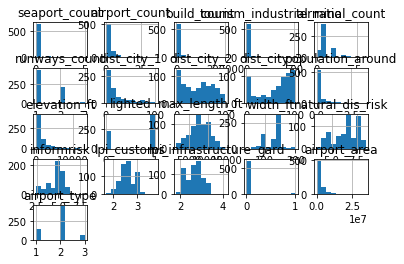

In [21]:
df_scaled.select_dtypes(include='number').hist()

# df_scaled_test.select_dtypes(include='number').hist()

array([[<AxesSubplot:title={'center':'seaport_count'}>,
        <AxesSubplot:title={'center':'airport_count'}>,
        <AxesSubplot:title={'center':'build_count'}>,
        <AxesSubplot:title={'center':'tourism_industrial_ratio'}>,
        <AxesSubplot:title={'center':'terminal_count'}>],
       [<AxesSubplot:title={'center':'runways_count'}>,
        <AxesSubplot:title={'center':'dist_city_1'}>,
        <AxesSubplot:title={'center':'dist_city_2'}>,
        <AxesSubplot:title={'center':'dist_city_3'}>,
        <AxesSubplot:title={'center':'population_around'}>],
       [<AxesSubplot:title={'center':'elevation_ft'}>,
        <AxesSubplot:title={'center':'lighted'}>,
        <AxesSubplot:title={'center':'max_length_ft'}>,
        <AxesSubplot:title={'center':'width_ft'}>,
        <AxesSubplot:title={'center':'natural_dis_risk'}>],
       [<AxesSubplot:title={'center':'informrisk'}>,
        <AxesSubplot:title={'center':'lpi_customs'}>,
        <AxesSubplot:title={'center':'lpi_infrastru

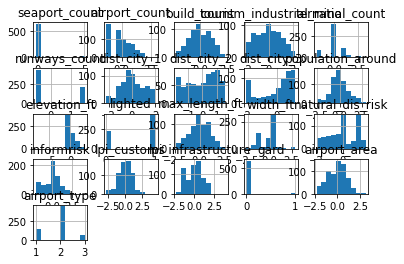

In [22]:
from sklearn.preprocessing import PowerTransformer # applying a transformer that is okay to use with negative and 0 values
scaler = PowerTransformer(method = 'yeo-johnson')


df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

df_scaled.hist()

# from sklearn.preprocessing import PowerTransformer # applying a transformer that is okay to use with negative and 0 values
# scaler = PowerTransformer(method = 'yeo-johnson')


# df_scaled_test[col_names] = scaler.fit_transform(features.values)
# df_scaled_test

# df_scaled_test.hist()

In [23]:
# df_scaled['lighted'].hist() # trying to change the distribution to more normal for the features that did not change under the 'yeo-johnson' transofrmation

<AxesSubplot:>

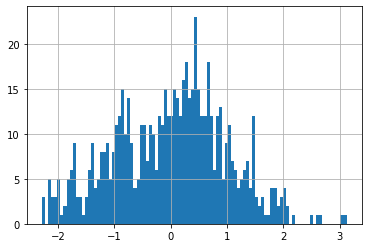

In [25]:
df_scaled['airport_area'].hist(bins = 100) 

In [26]:
# from sklearn.preprocessing import OneHotEncoder
# enc = preprocessing.OneHotEncoder(handle_unknown='ignore') # encoding categorical features 

# cat_names = df_scaled.select_dtypes(include=['object']).drop(['iata'], axis=1).columns
# df_scaled[cat_names] = enc.fit(cat_features)

# cat_features = df_scaled[cat_names]
# enc.categories_

In [27]:
from sklearn.preprocessing import LabelBinarizer


In [28]:
cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_scaled.copy()['iso_country'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

# cat_names = df_scaled_test.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

# lb = LabelBinarizer()
# lb_results = lb.fit_transform(df_scaled_test.copy()['iso_country'])
# lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)




In [29]:
# cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

# lb = LabelBinarizer()
# lb_results = lb.fit_transform(df_scaled.copy()['aptclass'])
# lb_aptclass_df = pd.DataFrame(lb_results, columns=lb.classes_)

# print(lb_aptclass_df)

# cat_names = df_scaled_test.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

# lb = LabelBinarizer()
# lb_results = lb.fit_transform(df_scaled_test.copy()['aptclass'])
# lb_aptclass_df = pd.DataFrame(lb_results, columns=lb.classes_)

# print(lb_aptclass_df)

In [30]:
# cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

# lb = LabelBinarizer()
# lb_results = lb.fit_transform(df_scaled.copy()['apttype'])
# lb_apttype_df = pd.DataFrame(lb_results, columns=lb.classes_)

# print(lb_apttype_df)

# cat_names = df_scaled_test.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

# lb = LabelBinarizer()
# lb_results = lb.fit_transform(df_scaled_test.copy()['apttype'])
# lb_apttype_df = pd.DataFrame(lb_results, columns=lb.classes_)

# print(lb_apttype_df)

In [31]:
cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_scaled.copy()['authority'])
lb_authority_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_authority_df)

# cat_names = df_scaled_test.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

# lb = LabelBinarizer()
# lb_results = lb.fit_transform(df_scaled_test.copy()['authority'])
# lb_authority_df = pd.DataFrame(lb_results, columns=lb.classes_)

# print(lb_authority_df)

     Civil  Civil/Military  Military  Private  Unknown
0        1               0         0        0        0
1        1               0         0        0        0
2        0               1         0        0        0
3        0               1         0        0        0
4        1               0         0        0        0
..     ...             ...       ...      ...      ...
645      1               0         0        0        0
646      1               0         0        0        0
647      1               0         0        0        0
648      1               0         0        0        0
649      0               0         0        0        1

[650 rows x 5 columns]


In [32]:
# cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

# lb = LabelBinarizer()
# lb_results = lb.fit_transform(df_scaled.copy()['humuse'])
# lb_humuse_df = pd.DataFrame(lb_results, columns=lb.classes_)

# print(lb_humuse_df)

# cat_names = df_scaled_test.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

# lb = LabelBinarizer()
# lb_results = lb.fit_transform(df_scaled_test.copy()['humuse'])
# lb_humuse_df = pd.DataFrame(lb_results, columns=lb.classes_)

# print(lb_humuse_df)

In [33]:
# cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

# lb = LabelBinarizer()
# lb_results = lb.fit_transform(df_scaled.copy()['airport_type'])
# lb_airport_type_df = pd.DataFrame(lb_results, columns=lb.classes_)

# lb_airport_type_df

# cat_names = df_scaled_test.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

# lb = LabelBinarizer()
# lb_results = lb.fit_transform(df_scaled_test.copy()['airport_type'])
# lb_airport_type_df = pd.DataFrame(lb_results, columns=lb.classes_)

# print(lb_airport_type_df)

In [34]:
# lb_aptclass_df.index=df_scaled.index
# merged = pd.concat([df_scaled, lb_aptclass_df], axis=1)
# merged

# lb_aptclass_df.index=df_scaled_test.index
# merged_test = pd.concat([df_scaled_test, lb_aptclass_df], axis=1)
# merged_test

In [35]:
# lb_apttype_df.index=merged.index
# merged = pd.concat([merged, lb_apttype_df], axis=1)
# merged

# lb_apttype_df.index=merged_test.index
# merged_test = pd.concat([merged_test, lb_apttype_df], axis=1)
# merged_test

In [36]:
lb_authority_df.index=df_scaled.index
merged_train = pd.concat([df_scaled, lb_authority_df], axis=1)
merged_train

# lb_authority_df.index=merged_test.index
# merged_test = pd.concat([merged_test, lb_authority_df], axis=1)
# merged_test

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN      -0.195803      -1.328615    -0.854444   
90   BIR          NP      -0.195803       1.166071     1.732210   
911  UPB          CU      -0.195803       0.315171    -0.239229   
181  CMB          LK      -0.195803       1.607052     1.662794   
274  EOH          CO      -0.195803       0.684086     1.371686   
..   ...         ...            ...            ...          ...   
106  BMO          MM      -0.195803      -0.245932    -0.337550   
270  ELG          DZ      -0.195803      -1.328615    -0.526789   
860  TKG          ID      -0.195803      -0.245932    -0.241902   
435  KAC          SY      -0.195803       0.315171     0.197381   
102  BLG          MY      -0.195803      -0.245932    -0.773751   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                  1.476506       -0.091762       1.414785    -2.237748   
90                  -0.911204        0.978116       1.414785    -1.321926   
911                  0.785285       -0.091762      -0.702849     0.600628   
181                 -1.138971       -0.091762      -0.702849     0.137036   
274                 -0.092884       -0.091762      -0.702849    -1.004068   
..                        ...             ...            ...          ...   
106                  1.026688       -1.845002      -0.702849    -1.520479   
270                  1.490090        0.978116       1.414785    -0.687347   
860                 -0.322266       -0.091762       1.414785     0.592793   
435                 -0.950320        1.757754      -0.702849    -0.858763   
102                  0.672872       -1.845002      -0.702849     0.655278   

     dist_city_2  ...  lpi_customs  lpi_infrastructure  gard  airport_area  \
922    -1.805792  ...     0.911491            0.683298     0     -0.332423   
90      0.006020  ...    -1.322976           -1.245685     0     -0.496436   
911    -0.409011  ...    -1.447769           -1.539557     0      0.325080   
181    -0.359437  ...    -0.088570           -0.737541     1      0.723751   
274    -1.482522  ...    -0.322521           -0.228736     0     -0.409612   
..           ...  ...          ...                 ...   ...           ...   
106    -1.034752  ...    -1.260207           -1.486144     0     -0.916788   
270    -1.805792  ...    -1.038571           -0.576935     0      0.812872   
860     0.178721  ...     0.319262            0.388020     0     -0.329384   
435     0.767777  ...    -2.781828           -1.459434     0      0.588669   
102     1.366630  ...     1.629607            1.704797     0     -2.037369   

     airport_type  Civil Civil/Military Military Private Unknown  
922             2      1              0        0       0       0  
90              2      1              0        0       0       0  
911             2      0              1        0       0       0  
181             3      0              1        0       0       0  
274             2      1              0        0       0       0  
..            ...    ...            ...      ...     ...     ...  
106             1      1              0        0       0       0  
270             2      1              0        0       0       0  
860             2      1              0        0       0       0  
435             2      1              0        0       0       0  
102             1      0              0        0       0       1  

[650 rows x 32 columns]

In [37]:
# lb_humuse_df.index=merged.index
# merged = pd.concat([merged, lb_humuse_df], axis=1)
# merged

# lb_humuse_df.index=merged_test.index
# merged_test = pd.concat([merged_test, lb_humuse_df], axis=1)
# merged_test

In [38]:
# lb_airport_type_df.index=merged.index
# merged = pd.concat([merged, lb_airport_type_df], axis=1)
# merged

# lb_airport_type_df.index=merged_test.index
# merged_test = pd.concat([merged_test, lb_airport_type_df], axis=1)
# merged_test

In [39]:
data = merged_train
data = data[data.columns.difference(['iso_country', 'aptclass', 'apttype', 
                                     'authority', 'humuse', 'gard',
                                     'Closed', 'Unknown', 'iata', 'Civil', 
                                     'Civil/Military', 'Military','Private'])]

# data_test = merged_test
# data_test = data_test[data_test.columns.difference(['iso_country', 'aptclass', 'apttype', 
#                                      'authority', 'humuse', 'gard', 'airport_type',
#                                      'Closed', 'Unknown'])]

In [40]:
data

airport_area  airport_count  airport_type  build_count  dist_city_1  \
922     -0.332423      -1.328615             2    -0.854444    -2.237748   
90      -0.496436       1.166071             2     1.732210    -1.321926   
911      0.325080       0.315171             2    -0.239229     0.600628   
181      0.723751       1.607052             3     1.662794     0.137036   
274     -0.409612       0.684086             2     1.371686    -1.004068   
..            ...            ...           ...          ...          ...   
106     -0.916788      -0.245932             1    -0.337550    -1.520479   
270      0.812872      -1.328615             2    -0.526789    -0.687347   
860     -0.329384      -0.245932             2    -0.241902     0.592793   
435      0.588669       0.315171             2     0.197381    -0.858763   
102     -2.037369      -0.245932             1    -0.773751     0.655278   

     dist_city_2  dist_city_3  elevation_ft  informrisk  lighted  lpi_customs  \
922    -1.805792    -1.868460     -0.887175   -1.055509      0.0     0.911491   
90      0.006020     0.233454     -0.455015    0.376036      1.0    -1.322976   
911    -0.409011    -0.967881     -0.663313   -2.026888      1.0    -1.447769   
181    -0.359437    -0.824933     -0.847242   -0.970249      1.0    -0.088570   
274    -1.482522    -1.356704      1.672260    0.591206      1.0    -0.322521   
..           ...          ...           ...         ...      ...          ...   
106    -1.034752    -1.211601     -0.302553    1.628468      0.0    -1.260207   
270    -1.805792    -1.868460      0.356700   -0.883515      0.0    -1.038571   
860     0.178721     0.006810     -0.398625   -0.037345      1.0     0.319262   
435     0.767777     0.328557      0.447051    2.911102      0.0    -2.781828   
102     1.366630     1.158002      0.372479   -1.535758      0.0     1.629607   

     lpi_infrastructure  max_length_ft  natural_dis_risk  population_around  \
922            0.683298      -0.683578          0.750987          -2.595904   
90            -1.245685      -1.101559         -0.600567          -0.315540   
911           -1.539557      -0.109096         -0.747183           0.681721   
181           -0.737541       1.197940         -1.025719           0.831445   
274           -0.228736       0.133692          0.120368           1.166739   
..                  ...            ...               ...                ...   
106           -1.486144      -0.888846          1.139085          -0.530523   
270           -0.576935       0.759049         -1.346532          -1.225105   
860            0.388020       0.133692          1.040160           0.873578   
435           -1.459434       1.530852         -0.674489          -0.193351   
102            1.704797      -0.004001         -1.221837          -0.762125   

     runways_count  seaport_count  terminal_count  tourism_industrial_ratio  \
922       1.414785      -0.195803       -0.091762                  1.476506   
90        1.414785      -0.195803        0.978116                 -0.911204   
911      -0.702849      -0.195803       -0.091762                  0.785285   
181      -0.702849      -0.195803       -0.091762                 -1.138971   
274      -0.702849      -0.195803       -0.091762                 -0.092884   
..             ...            ...             ...                       ...   
106      -0.702849      -0.195803       -1.845002                  1.026688   
270       1.414785      -0.195803        0.978116                  1.490090   
860       1.414785      -0.195803       -0.091762                 -0.322266   
435      -0.702849      -0.195803        1.757754                 -0.950320   
102      -0.702849      -0.195803       -1.845002                  0.672872   

     width_ft  
922 -1.134306  
90  -1.134306  
911  0.597909  
181  0.597909  
274 -0.285813  
..        ...  
106 -1.070922  
270  0.597909  
860 -1.196884  
435  0.679218  
102 -0.070732  

[650 rows x 20 columns]

In [41]:
data.dtypes

airport_area                float64
airport_count               float64
airport_type                  int64
build_count                 float64
dist_city_1                 float64
dist_city_2                 float64
dist_city_3                 float64
elevation_ft                float64
informrisk                  float64
lighted                     float64
lpi_customs                 float64
lpi_infrastructure          float64
max_length_ft               float64
natural_dis_risk            float64
population_around           float64
runways_count               float64
seaport_count               float64
terminal_count              float64
tourism_industrial_ratio    float64
width_ft                    float64
dtype: object

In [42]:
# from sklearn.preprocessing import PowerTransformer # applying a transformer that is okay to use with negative and 0 values
# scaler = PowerTransformer(method = 'yeo-johnson')


# df_scaled_test[col_names] = scaler.fit_transform(features.values)
# df_scaled_test

# df_scaled_test.hist()

from sklearn.preprocessing import StandardScaler
# fit transform
transformer = StandardScaler()
data = transformer.fit_transform(data.values)
data

print(data)

# df_scaled_test.hist()
# transformer.fit(data)
# # difference transform
# transformed = transformer.transform(data)
# print(transformed)

[[-0.33242285 -1.32861509  0.20649456 ... -0.09176211  1.47650629
  -1.13430555]
 [-0.49643606  1.16607114  0.20649456 ...  0.97811571 -0.91120388
  -1.13430555]
 [ 0.32508016  0.31517128  0.20649456 ... -0.09176211  0.78528478
   0.59790943]
 ...
 [-0.32938358 -0.2459322   0.20649456 ... -0.09176211 -0.32226601
  -1.19688395]
 [ 0.58866897  0.31517128  0.20649456 ...  1.75775396 -0.95031969
   0.67921775]
 [-2.03736885 -0.2459322  -1.60730904 ... -1.84500167  0.67287154
  -0.07073227]]


In [43]:
data_test.dtypes

NameError: name 'data_test' is not defined

In [44]:
# # moving iata to front

data = data[ ['iata'] + [ col for col in data.columns if col != 'iata' ] ]

# data_test = data_test[ ['iata'] + [ col for col in data_test.columns if col != 'iata' ] ]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [45]:
data = data.loc[:, data.columns != 'iata']

# data_test = data_test.loc[:, data_test.columns != 'iata']


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [46]:
list(data.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [47]:
names = [
 'airport_area',
 'airport_count',
 'airport_type',
 'build_count',
 'dist_city_1',
 'dist_city_2',
 'dist_city_3',
 'elevation_ft',
 'informrisk',
 'lighted',
 'lpi_customs',
 'lpi_infrastructure',
 'max_length_ft',
 'natural_dis_risk',
 'population_around',
 'runways_count',
 'seaport_count',
 'terminal_count',
 'tourism_industrial_ratio',
 'width_ft']

# data = data.values

In [48]:
data

array([[-0.33242285, -1.32861509,  0.20649456, ..., -0.09176211,
         1.47650629, -1.13430555],
       [-0.49643606,  1.16607114,  0.20649456, ...,  0.97811571,
        -0.91120388, -1.13430555],
       [ 0.32508016,  0.31517128,  0.20649456, ..., -0.09176211,
         0.78528478,  0.59790943],
       ...,
       [-0.32938358, -0.2459322 ,  0.20649456, ..., -0.09176211,
        -0.32226601, -1.19688395],
       [ 0.58866897,  0.31517128,  0.20649456, ...,  1.75775396,
        -0.95031969,  0.67921775],
       [-2.03736885, -0.2459322 , -1.60730904, ..., -1.84500167,
         0.67287154, -0.07073227]])

In [49]:
# data = data.values

data_df = pd.DataFrame(data)
data_df


0         1         2         3         4         5         6   \
0   -0.332423 -1.328615  0.206495 -0.854444 -2.237748 -1.805792 -1.868460   
1   -0.496436  1.166071  0.206495  1.732210 -1.321926  0.006020  0.233454   
2    0.325080  0.315171  0.206495 -0.239229  0.600628 -0.409011 -0.967881   
3    0.723751  1.607052  2.020298  1.662794  0.137036 -0.359437 -0.824933   
4   -0.409612  0.684086  0.206495  1.371686 -1.004068 -1.482522 -1.356704   
..        ...       ...       ...       ...       ...       ...       ...   
645 -0.916788 -0.245932 -1.607309 -0.337550 -1.520479 -1.034752 -1.211601   
646  0.812872 -1.328615  0.206495 -0.526789 -0.687347 -1.805792 -1.868460   
647 -0.329384 -0.245932  0.206495 -0.241902  0.592793  0.178721  0.006810   
648  0.588669  0.315171  0.206495  0.197381 -0.858763  0.767777  0.328557   
649 -2.037369 -0.245932 -1.607309 -0.773751  0.655278  1.366630  1.158002   

           7         8         9         10        11        12        13  \
0   -0.887175 -1.055509 -1.365077  0.911491  0.683298 -0.683578  0.750987   
1   -0.455015  0.376036  0.732559 -1.322976 -1.245685 -1.101559 -0.600567   
2   -0.663313 -2.026888  0.732559 -1.447769 -1.539557 -0.109096 -0.747183   
3   -0.847242 -0.970249  0.732559 -0.088570 -0.737541  1.197940 -1.025719   
4    1.672260  0.591206  0.732559 -0.322521 -0.228736  0.133692  0.120368   
..        ...       ...       ...       ...       ...       ...       ...   
645 -0.302553  1.628468 -1.365077 -1.260207 -1.486144 -0.888846  1.139085   
646  0.356700 -0.883515 -1.365077 -1.038571 -0.576935  0.759049 -1.346532   
647 -0.398625 -0.037345  0.732559  0.319262  0.388020  0.133692  1.040160   
648  0.447051  2.911102 -1.365077 -2.781828 -1.459434  1.530852 -0.674489   
649  0.372479 -1.535758 -1.365077  1.629607  1.704797 -0.004001 -1.221837   

           14        15        16        17        18        19  
0   -2.595904  1.414785 -0.195803 -0.091762  1.476506 -1.134306  
1   -0.315540  1.414785 -0.195803  0.978116 -0.911204 -1.134306  
2    0.681721 -0.702849 -0.195803 -0.091762  0.785285  0.597909  
3    0.831445 -0.702849 -0.195803 -0.091762 -1.138971  0.597909  
4    1.166739 -0.702849 -0.195803 -0.091762 -0.092884 -0.285813  
..        ...       ...       ...       ...       ...       ...  
645 -0.530523 -0.702849 -0.195803 -1.845002  1.026688 -1.070922  
646 -1.225105  1.414785 -0.195803  0.978116  1.490090  0.597909  
647  0.873578  1.414785 -0.195803 -0.091762 -0.322266 -1.196884  
648 -0.193351 -0.702849 -0.195803  1.757754 -0.950320  0.679218  
649 -0.762125 -0.702849 -0.195803 -1.845002  0.672872 -0.070732  

[650 rows x 20 columns]

In [50]:

%matplotlib inline
import math
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib3
import joblib
import random
import matplotlib
from sompy.sompy import SOMFactory
from sompy.visualization.plot_tools import plot_hex_map
import logging

In [51]:
# Train the model with different parameters. The more, the better. Each iteration is stored in disk for further study 
for i in range(100): 
    sm = SOMFactory().build(data, mapsize=[random.choice(list(range(15, 25))), 
                                           random.choice(list(range(10, 15)))],
                            normalization = 'var', initialization='random', component_names=names, lattice="hexa") 
    sm.train(n_job=4, verbose=False, train_rough_len=30, train_finetune_len=100) 
    joblib.dump(sm, "model_{}.joblib".format(i))

KeyboardInterrupt: 

In [288]:
# Train the model with different parameters. The more, the better. Each iteration is stored in disk for further study 
model_map_sizes = list()
for i in range(100):
    map_size_x = random.choice(list(range(15, 25)))
    map_size_y = random.choice(list(range(10, 15)))
#     print("size of model " + str(i) + ": " + str(map_size_x) + ", " + str(map_size_y))
    model_map_sizes.append((i, map_size_x, map_size_y))
    print("size of model " + str(model_map_sizes[i][0]) + ": " + str(model_map_sizes[i][1]) + ", " + str(model_map_sizes[i][2]))
    sm = SOMFactory().build(data, mapsize=[map_size_x, map_size_y],
                            normalization = 'var', initialization='random', component_names=names, lattice="hexa") 
    sm.train(n_job=4, verbose=False, train_rough_len=30, train_finetune_len=100) 
    joblib.dump(sm, "model_{}.joblib".format(i))
    print("some other size: ", end = '')
    print(*sm.calculate_map_size(sm), sep = ', ')

size of model 0: 19, 10
some other size: 9, 14
size of model 1: 21, 14
some other size: 9, 14
size of model 2: 18, 10
some other size: 9, 14
size of model 3: 21, 14
some other size: 9, 14
size of model 4: 15, 13
some other size: 9, 14
size of model 5: 15, 12
some other size: 9, 14
size of model 6: 17, 14
some other size: 9, 14
size of model 7: 17, 14
some other size: 9, 14
size of model 8: 15, 12
some other size: 9, 14
size of model 9: 20, 10
some other size: 9, 14
size of model 10: 24, 12
some other size: 9, 14
size of model 11: 18, 13
some other size: 9, 14
size of model 12: 20, 13
some other size: 9, 14
size of model 13: 15, 10
some other size: 9, 14
size of model 14: 17, 11
some other size: 9, 14
size of model 15: 23, 14
some other size: 9, 14
size of model 16: 15, 10
some other size: 9, 14
size of model 17: 20, 12
some other size: 9, 14
size of model 18: 15, 14
some other size: 9, 14
size of model 19: 20, 13
some other size: 9, 14
size of model 20: 22, 10
some other size: 9, 14
si

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>]], dtype=object)

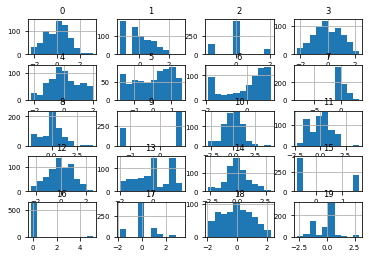

In [300]:
data_df.hist()

In [52]:
# Study the models trained and plot the errors obtained in order to select the best one
models_pool = glob.glob("./model*")
errors=[]
for model_filepath in models_pool:
    sm = joblib.load(model_filepath)
    topographic_error = sm.calculate_topographic_error()
    quantization_error = sm.calculate_quantization_error()
    errors.append((topographic_error, quantization_error))
e_top, e_q = zip(*errors)

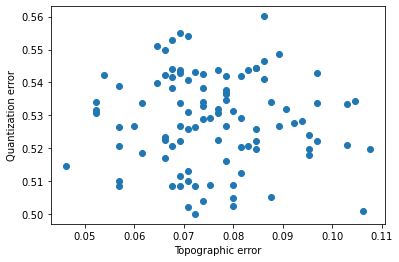

In [53]:
plt.scatter(e_top, e_q)
plt.xlabel("Topographic error")
plt.ylabel("Quantization error")
plt.show()

In [54]:
errors_df = pd.DataFrame(errors, columns = ['topographic_error', 'quantization_error'])


In [55]:
errors_df['topographic_error'].idxmin()

94

In [57]:
selected_model = 94

print("size of selected model " + str(model_map_sizes[selected_model][0]) + ": " +
      str(model_map_sizes[selected_model][1]) + ", " + str(model_map_sizes[selected_model][2]))

NameError: name 'model_map_sizes' is not defined

In [58]:
sm = joblib.load(models_pool[selected_model])

topographic_error = sm.calculate_topographic_error()
quantization_error = sm.calculate_quantization_error()
print("Topographic error = %s\nQuantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.046153846153846156
Quantization error = 0.5146772034727871


/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/SOMPY-1.1.1-py3.6.egg/sompy/visualization/plot_tools.py:45: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


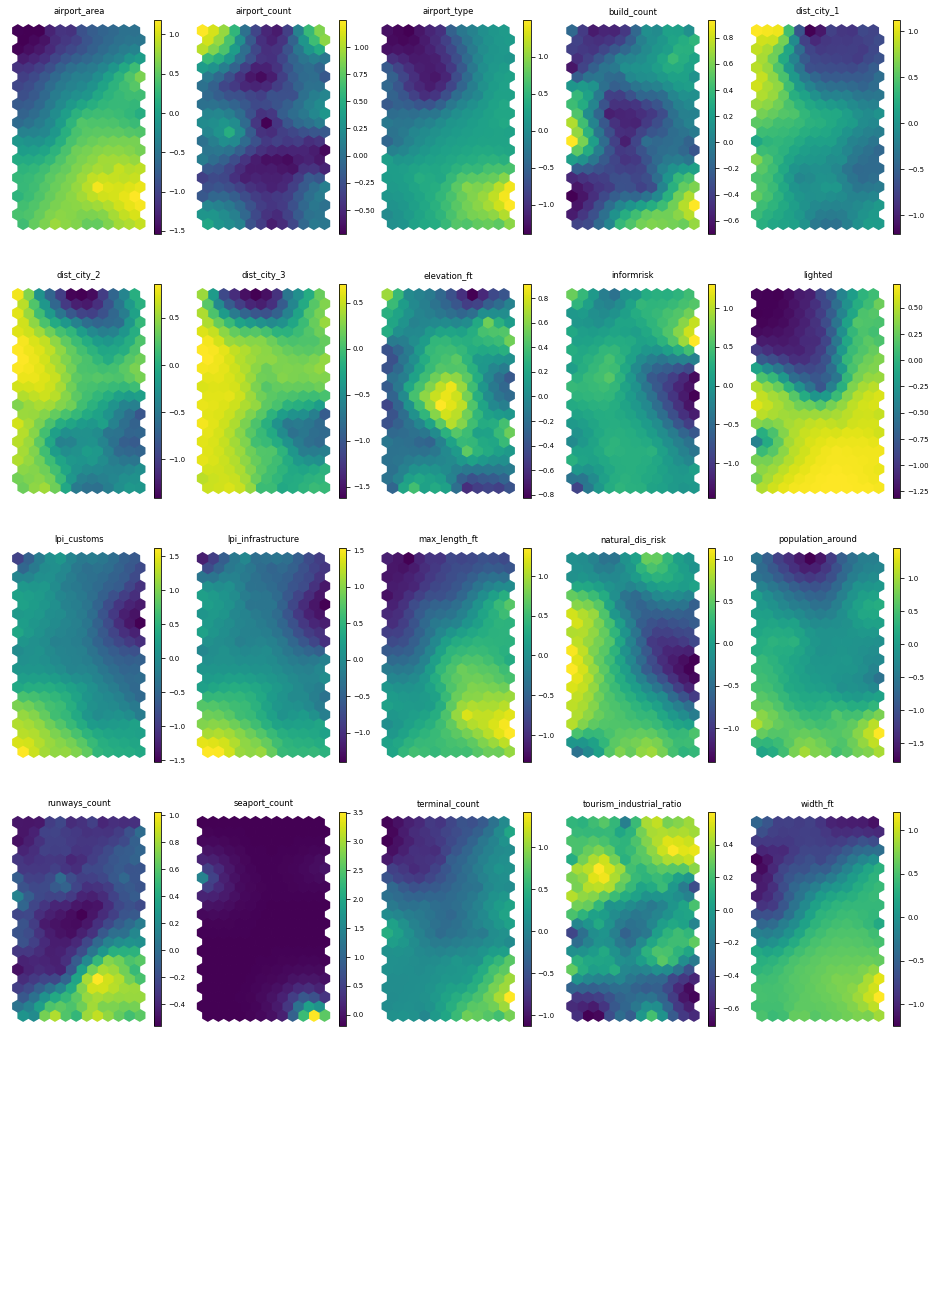

In [59]:
from sompy.visualization.mapview import View2D
view2D = View2D(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, which_dim="all", denormalize=True)
plt.show()

In [60]:
# Addition of some exogeneous variables to the map
# df["bmus"] = sm.project_data(data)
# df = df[clustering_vars + exogeneous_vars + ["Cancelled"] + ["bmus"]]

# empirical_codebook=df.groupby("bmus").mean().values
# matplotlib.rcParams.update({'font.size': 10})
# plot_hex_map(empirical_codebook.reshape(sm.codebook.mapsize + [empirical_codebook.shape[-1]]), 
#              titles=df.columns[:-1], shape=[4, 5], colormap=None)
# plt.show()

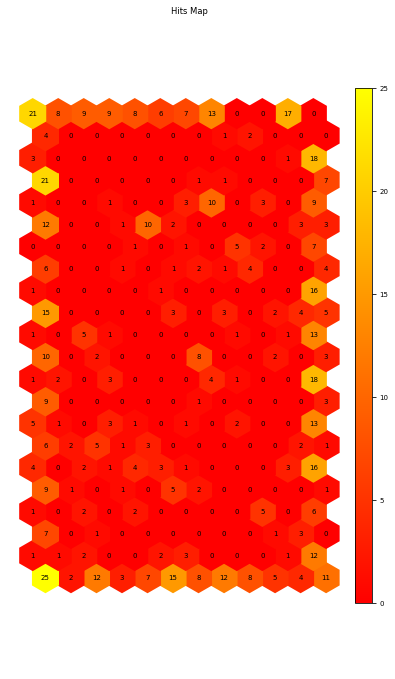

In [61]:
from sompy.visualization.bmuhits import BmuHitsView
#sm.codebook.lattice="rect"
vhts = BmuHitsView(12, 12, "Hits Map", text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)

# plt.show()

In [62]:
import collections

c = collections.Counter(sm._bmu[0])

bmu_counter = 0
som_cell = list()

for bmu in sm._bmu[0]:
    bmu_counter += 1
    som_cell.append(int(bmu))

som_cell

som_cell_df = pd.DataFrame(som_cell, columns=['som_cell'])
c

Counter({5.0: 8,
         12.0: 12,
         108.0: 18,
         204.0: 9,
         38.0: 5,
         168.0: 4,
         253.0: 17,
         135.0: 1,
         256.0: 13,
         148.0: 3,
         0.0: 11,
         4.0: 12,
         118.0: 2,
         125.0: 8,
         141.0: 5,
         120.0: 3,
         3.0: 8,
         17.0: 3,
         171.0: 4,
         259.0: 8,
         209.0: 3,
         60.0: 16,
         11.0: 25,
         263.0: 21,
         131.0: 10,
         258.0: 6,
         69.0: 2,
         228.0: 18,
         198.0: 2,
         8.0: 3,
         216.0: 7,
         192.0: 3,
         84.0: 13,
         203.0: 12,
         257.0: 7,
         133.0: 1,
         227.0: 21,
         35.0: 7,
         81.0: 5,
         122.0: 2,
         9.0: 12,
         36.0: 6,
         129.0: 2,
         6.0: 15,
         107.0: 9,
         132.0: 13,
         262.0: 8,
         156.0: 16,
         179.0: 6,
         2.0: 5,
         56.0: 1,
         21.0: 2,
         206.0: 3,
   

In [63]:
som_cell_df.index=dataset_train.index
som_result = pd.concat([dataset_train, som_cell_df], axis=1)


som_result.loc[som_result['som_cell'] == 11]

iata iso_country  seaport_count  airport_count  build_count  \
73   BDP          NP              0              5        11594   
185  CMU          PG              0             14           23   
457  KKD          PG              0             27          173   
551  MDU          PG              0             11         3486   
409  JAK          HT              0              2        19556   
866  TMI          NP              0              8         2332   
426  JMO          NP              0              4         1379   
444  KDR          PG              0              5            5   
854  TIZ          PG              0             14         4197   
434  JUM          NP              0              6         3184   
672  PKK          MM              0              5            5   
784  SKH          NP              0              5        24705   
255  DOP          NP              0              4         2210   
648  PAX          HT              0              1        12531   
376  IMK          NP              0              4         1581   
877  TPJ          NP              0              5         6583   
645  PAJ          PK              0              4           35   
690  PPL          NP              0              8         2737   
823  TAJ          PG              0              6            0   
748  RUM          NP              0             11         7948   
555  MEY          NP              0              6         5826   
454  KHT          AF              0              4           10   
315  GMI          PG              0              4           44   
951  WTP          PG              0             25            0   
747  RUK          NP              0              6         4595   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
73                   1.311881               1              2        79.81   
185                 15.333333               0              1        46.81   
457                  1.514286               0              1        76.90   
551                  3.147059               3              1        46.32   
409                  5.414894               0              1        34.82   
866                  4.795732               0              1        55.89   
426                 32.101010               0              1        58.38   
444                  1.000000               1              1        44.38   
854                  2.470588               0              1        47.71   
434                148.000000               1              1        57.64   
672                 98.000000               0              1        64.23   
784                 20.826087               0              1        59.63   
255                262.000000               1              1        69.64   
648                  4.518519               0              1        56.80   
376                 23.111111               0              2        66.53   
877                  4.021201               0              1        54.49   
645                  2.500000               1              1        32.72   
690                 21.818182               1              1        64.61   
823                  7.000000               0              1         9.92   
748                 12.663462               0              1        58.76   
555                  1.725833               0              1        26.74   
454                  6.000000               0              2         3.28   
315                  1.100000               1              1        46.62   
951                  1.238095               0              1        32.02   
747                 26.500000               1              1        48.89   

     dist_city_2  ...  authority      humuse  natural_dis_risk  informrisk  \
73         79.87  ...      Civil          No               5.8         5.2   
185        85.07  ...    Unknown     Unknown               6.7         5.8   
457        86.13  ...   

In [299]:
import collections

c = collections.Counter(sm._bmu[0])

# bmus = sm.find_bmu(data)
# bmus_df = pd.DataFrame(bmus)
# bmus_df.to_csv(r'/Users/mariabrowarska/Downloads/export_bmus.csv', index=False, header=True)
# bmus_df


# 

bmu_counter = 0


for bmu in sm._bmu[0]:
    bmu_counter += 1
    print(int(bmu))

print("total: " + str(bmu_counter))

#grouped cells - cell: number of datapoints inside 

# c

84
43
228
231
67
156
238
217
235
228
171
6
228
84
8
228
238
147
59
228
5
65
48
171
200
235
180
236
0
179
171
56
203
112
227
47
238
125
36
185
227
0
232
204
128
194
180
5
200
228
229
131
12
83
23
229
238
12
31
44
71
192
60
13
200
23
36
35
230
167
236
230
228
73
52
24
128
96
156
211
185
115
185
0
228
204
227
67
60
229
185
155
23
107
161
185
2
10
189
118
52
97
138
140
147
131
229
8
204
155
227
60
155
235
4
147
0
235
227
179
72
128
160
167
36
180
193
131
238
179
61
2
239
88
227
179
84
75
0
179
1
5
109
157
230
203
143
132
9
131
132
236
139
178
59
231
233
31
35
204
83
120
0
119
0
184
177
236
232
11
180
128
185
235
204
120
52
238
7
3
80
120
228
204
78
151
56
156
161
180
179
227
2
52
112
128
0
67
52
0
4
239
230
180
163
227
4
36
75
72
72
227
232
1
144
4
239
167
59
171
134
227
75
155
204
239
81
230
227
185
236
84
9
83
55
228
236
80
23
131
228
47
147
0
160
12
121
155
48
179
9
203
185
36
120
232
2
55
75
227
236
75
180
60
0
204
228
132
23
180
149
130
131
23
211
209
218
232
215
200
80
60
9
204
84
12

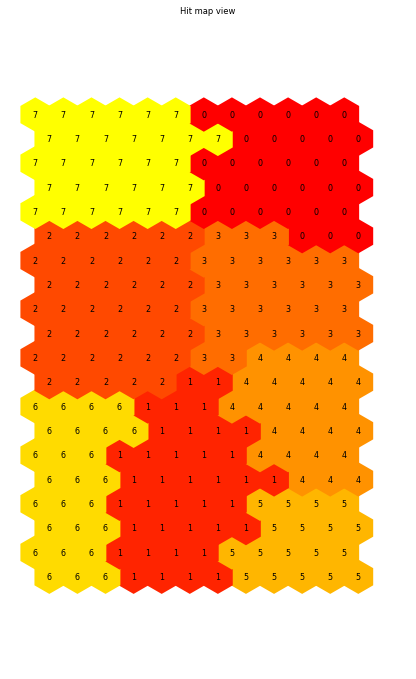

In [303]:
from sompy.visualization.hitmap import HitMapView

hitmap = HitMapView(12,12, "Hit map view", text_size=7)
hitmap.show(sm, anotate=True, onlyzeros=False, labelsize=8, cmap="autumn")
# plt.show()

/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/SOMPY-1.1.1-py3.6.egg/sompy/visualization/umatrix.py:48: UserWarning: No contour levels were found within the data range.


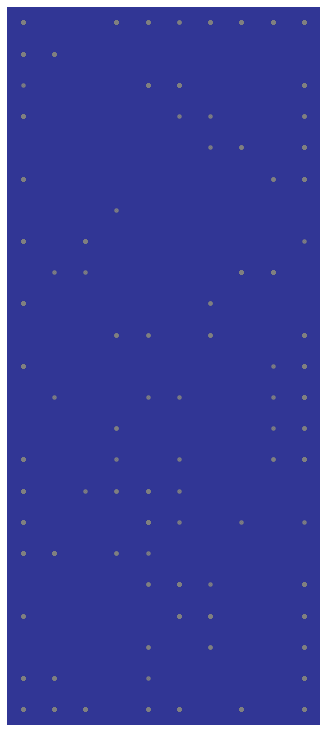

In [681]:
from sompy.visualization.umatrix import UMatrixView

umatrix = UMatrixView(12,12, "UMatrixView", text_size=7)
umatrix.show(sm, row_normalized=False)
plt.show()

In [721]:
map_labels = sm.cluster(n_clusters=4)
data_labels = np.array([map_labels[int(k)] for k in sm._bmu[0]])
data_labels

array([1, 1, 2, 0, 2, 2, 0, 2, 3, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 3, 1, 1,
       1, 2, 3, 0, 3, 3, 1, 3, 2, 1, 3, 1, 0, 1, 3, 1, 1, 3, 0, 1, 0, 2,
       1, 0, 2, 1, 3, 3, 2, 3, 1, 3, 1, 2, 0, 1, 1, 2, 1, 0, 1, 3, 3, 1,
       1, 1, 2, 3, 0, 2, 2, 2, 1, 1, 3, 1, 2, 0, 2, 3, 0, 1, 2, 2, 0, 1,
       1, 2, 0, 3, 1, 3, 3, 3, 1, 1, 3, 0, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3,
       0, 1, 3, 0, 2, 2, 1, 2, 0, 3, 1, 0, 2, 3, 1, 2, 2, 3, 0, 3, 1, 1,
       0, 2, 0, 3, 3, 1, 1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 3, 0, 0, 3, 0,
       2, 2, 2, 2, 1, 2, 3, 2, 1, 3, 1, 0, 3, 0, 0, 1, 0, 3, 3, 0, 2, 2,
       1, 3, 1, 1, 3, 2, 0, 2, 2, 3, 1, 1, 3, 0, 3, 0, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 0, 2, 2, 3, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 0, 3, 2, 0,
       3, 0, 1, 3, 2, 0, 1, 2, 0, 2, 3, 1, 1, 1, 2, 0, 0, 3, 1, 3, 2, 1,
       2, 1, 2, 1, 2, 3, 1, 3, 1, 3, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 1,
       1, 2, 0, 2, 2, 2, 3, 3, 3, 1, 0, 0, 0, 0, 3, 0, 3, 2, 1, 2, 1, 1,
       0, 2, 1, 3, 1, 0, 1, 2, 3, 2, 3, 0, 0, 3, 1,

In [683]:
coordinates = sm.codebook.matrix
coodrinates_df = pd.DataFrame(sm.codebook.matrix)
coodrinates_df

0         1         2         3         4         5         6   \
0    1.628097 -0.737126 -0.286865  0.792678 -0.230455 -0.145999  1.064958   
1    1.559735 -0.696718 -0.267843  0.752231 -0.203288 -0.144673  1.055516   
2    1.577441 -0.739970 -0.226604  0.695192 -0.199259 -0.144649  1.041433   
3    1.657416 -0.827980 -0.189680  0.648778 -0.205132 -0.146361  1.033901   
4    1.267089 -0.667521  0.033325  0.548848 -0.245239 -0.146390  0.971619   
..        ...       ...       ...       ...       ...       ...       ...   
225 -0.281625  0.751552 -0.267311 -0.598796  0.780720 -0.148260 -0.527702   
226 -0.022074  0.529935 -0.230276 -0.558485  1.068389 -0.148285 -0.004132   
227  0.182244  0.357910 -0.203445 -0.608569  1.444335 -0.148328  0.451363   
228  0.560171  0.007143 -0.109016 -0.301745  0.528967 -0.148340  0.494362   
229  0.624750 -0.082964 -0.035301 -0.432538 -0.008991 -0.148352  0.400022   

           7         8         9   ...        26        27        28  \
0   -0.038905 -0.088045 -0.653882  ... -0.818249  0.570960  1.033189   
1   -0.037897 -0.088045 -0.652569  ... -0.794747  0.259991  0.933844   
2   -0.035511 -0.088045 -0.650411  ... -0.762911 -0.457576  0.770584   
3   -0.033221 -0.088045 -0.649593  ... -0.749747 -1.105913  0.650809   
4   -0.020068 -0.088045 -0.643625  ... -0.764018 -1.144513  0.417174   
..        ...       ...       ...  ...       ...       ...       ...   
225 -0.039253 -0.045274  0.989922  ...  0.777806  0.328854  0.428744   
226 -0.039253 -0.066903  0.303953  ...  0.561877  0.360184  0.383679   
227 -0.039253 -0.081455 -0.300519  ...  0.441665  0.389219  0.365829   
228 -0.039253 -0.084829 -0.456197  ...  0.303175  0.438126  0.451641   
229 -0.039253 -0.086816 -0.570308  ...  0.210164  0.439555  0.474024   

           29        30        31        32        33        34        35  
0   -0.112107 -0.102425  0.199460 -0.400411 -0.238003  0.472209 -1.044257  
1   -0.121324 -0.122023  0.144856 -0.048984 -0.218052  0.486188 -0.974657  
2   -0.115648 -0.143394  0.073733  0.763372 -0.155067  0.443045 -0.870124  
3   -0.102762 -0.156280  0.024715  1.497995 -0.098656  0.396200 -0.796454  
4   -0.388539 -0.255627 -0.058667  1.541802 -0.454376  0.430529 -0.719315  
..        ...       ...       ...       ...       ...       ...       ...  
225  1.002614  0.482575 -0.046504 -0.415695  0.361089 -0.650674  0.575953  
226  0.789059  0.312112  0.119031 -0.303507  0.240449 -0.612066  0.481446  
227  0.661564  0.180245  0.277820 -0.237882  0.156809 -0.631040  0.403655  
228  0.746092  0.154453  0.108690 -0.270477  0.144730 -0.471784  0.276044  
229  0.739136  0.154047 -0.032472 -0.258752  0.104834 -0.343268  0.151968  

[230 rows x 36 columns]

In [685]:
# codebook_matrix = sm.codebook.matrix
# # codebook_matrix_df = pd.DataFrame(codebook_matrix)
# print("reminder: size of selected model " + str(model_map_sizes[selected_model][0]) + ": " +
#       str(model_map_sizes[selected_model][1]) + ", " + str(model_map_sizes[selected_model][2]))
# print("this is: " + str(model_map_sizes[selected_model][1] * model_map_sizes[selected_model][2]))
# codebook_matrix_df
    
# # sm.codebook.matrix

reminder: size of selected model 0: 23, 10
this is: 230


Counter({6.0: 17,
         30.0: 16,
         50.0: 17,
         192.0: 3,
         70.0: 27,
         150.0: 21,
         170.0: 16,
         189.0: 12,
         160.0: 6,
         85.0: 3,
         88.0: 7,
         10.0: 39,
         124.0: 3,
         20.0: 4,
         33.0: 6,
         208.0: 13,
         194.0: 2,
         133.0: 7,
         199.0: 21,
         197.0: 3,
         207.0: 8,
         54.0: 4,
         221.0: 3,
         64.0: 5,
         217.0: 4,
         214.0: 15,
         87.0: 2,
         171.0: 10,
         103.0: 3,
         131.0: 3,
         114.0: 3,
         209.0: 9,
         44.0: 8,
         168.0: 9,
         24.0: 4,
         140.0: 5,
         8.0: 5,
         84.0: 1,
         206.0: 10,
         142.0: 3,
         43.0: 9,
         7.0: 1,
         110.0: 18,
         218.0: 5,
         204.0: 3,
         63.0: 5,
         22.0: 6,
         186.0: 7,
         226.0: 4,
         185.0: 5,
         225.0: 11,
         29.0: 9,
         130.0: 3,
  

In [664]:
# # sm.bmu_ind_to_xy(273)
# msz = sm.codebook.mapsize

# cents = sm.bmu_ind_to_xy(1, 2)

# cents
# # msz

TypeError: bmu_ind_to_xy() takes 2 positional arguments but 3 were given

Counter({293.0: 29, 0.0: 20, 252.0: 15, 280.0: 15, 182.0: 14, 8.0: 13, 13.0: 13, 289.0: 12, 3.0: 12, 42.0: 12, 210.0: 12, 209.0: 12, 126.0: 12, 287.0: 11, 70.0: 11, 11.0: 11, 286.0: 11, 281.0: 11, 283.0: 11, 153.0: 11, 288.0: 10, 41.0: 10, 78.0: 10, 84.0: 9, 6.0: 9, 55.0: 9, 44.0: 9, 266.0: 8, 7.0: 8, 291.0: 8, 5.0: 8, 265.0: 7, 292.0: 7, 207.0: 7, 98.0: 7, 282.0: 6, 170.0: 6, 97.0: 6, 154.0: 6, 195.0: 6, 45.0: 6, 238.0: 5, 111.0: 5, 237.0: 5, 140.0: 5, 202.0: 5, 217.0: 5, 175.0: 4, 177.0: 4, 165.0: 4, 137.0: 4, 4.0: 4, 149.0: 4, 52.0: 4, 249.0: 4, 203.0: 4, 181.0: 4, 226.0: 4, 10.0: 4, 256.0: 4, 145.0: 3, 156.0: 3, 186.0: 3, 284.0: 3, 239.0: 3, 224.0: 3, 141.0: 3, 77.0: 3, 47.0: 3, 218.0: 3, 164.0: 3, 108.0: 3, 161.0: 3, 93.0: 3, 285.0: 3, 232.0: 2, 74.0: 2, 56.0: 2, 204.0: 2, 139.0: 2, 112.0: 2, 61.0: 2, 171.0: 2, 220.0: 2, 290.0: 2, 274.0: 2, 248.0: 2, 148.0: 2, 199.0: 2, 31.0: 2, 162.0: 2, 146.0: 2, 20.0: 2, 69.0: 2, 196.0: 2, 206.0: 2, 277.0: 2, 12.0: 2, 83.0: 2, 125.0: 1, 255.0: 

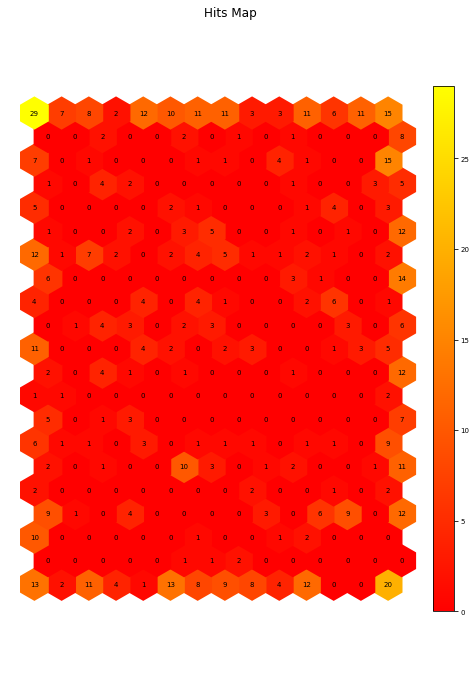

In [332]:
# from sompy.visualization.bmuhits import BmuHitsView
# #sm.codebook.lattice="rect"
# print(sm)
# vhts = BmuHitsView(12,12,"Hits Map",text_size=7)
# vhts.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)

# print(sm._bmu)

# # import collections

# # x = collections.Counter(sm._bmu[0])
# print(x)
# # y = list(x.elements())
# # print(y)

# # for letter in 'abcde':
# #     print(letter, x[letter])

# plt.show()


[3 3 3 3 3 4 4 4 7 7 7 7 7 7 3 3 3 3 3 3 4 4 4 7 7 7 7 7 3 3 3 3 3 4 4 4 7
 7 7 7 7 7 3 3 3 3 3 4 4 4 4 7 7 7 7 7 8 8 8 3 4 4 4 4 4 1 1 1 1 1 8 8 8 8
 8 4 4 4 4 4 1 1 1 1 8 8 8 8 4 4 4 4 4 1 1 1 1 1 8 8 8 8 8 4 4 4 4 4 1 1 1
 1 8 8 8 8 4 4 4 4 4 4 1 1 1 1 8 8 8 8 4 4 4 4 4 6 6 6 6 6 8 8 8 8 4 4 4 4
 6 6 6 6 6 6 8 8 8 0 0 0 4 4 6 6 6 6 6 6 0 0 0 0 0 0 0 6 6 6 6 6 6 6 0 0 0
 0 0 0 0 0 6 6 6 6 6 6 0 0 0 0 0 0 0 6 6 6 6 6 6 6 5 5 5 0 0 0 0 0 6 6 6 6
 6 6 5 5 5 5 5 2 2 2 2 6 6 6 6 6 5 5 5 5 5 5 2 2 2 2 6 6 6 6 5 5 5 5 5 2 2
 2 2 2 6 6 6 6 5 5 5 5 5 2 2 2 2 2 2 6 6 6 5 5 5 5 2 2 2 2 2 2 2 6 6 6 5 5
 5 5 5 2 2 2 2 9 9 2 2 2 5 5 5 5 2 2 2 9 9 9 9 2 2 2 5 5 5 5 5 2 2 2 9 9 9
 9 2 2]


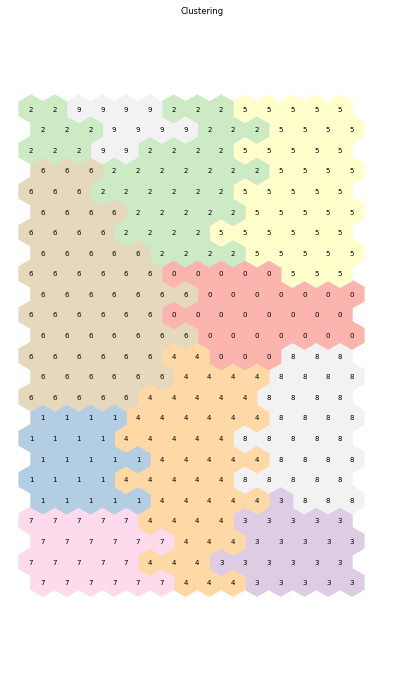

In [256]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(10)

hits  = HitMapView(12, 12,"Clustering",text_size=10, cmap=plt.cm.jet)
a=hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
print(getattr(sm, 'cluster_labels'))
plt.show()

## XXX

In [229]:
names = ['Airfield',
 'Airport',
 'Airstrip',
 'Civil',
 'Civil/Military',
 'Connection',
 'Domestic',
 'Helipad',
 'Hub',
 'International',
 'Military',
 'No',
 'Private',
 'Upon Request',
 'airport_area',
 'airport_count',
 'build_count',
 'dist_city_1',
 'dist_city_2',
 'dist_city_3',
 'elevation_ft',
 'informrisk',
 'large_airport',
 'lighted',
 'lpi_customs',
 'lpi_infrastructure',
 'max_length_ft',
 'medium_airport',
 'natural_dis_risk',
 'population_around',
 'runways_count',
 'seaport_count',
 'small_airport',
 'terminal_count',
 'tourism_industrial_ratio',
 'width_ft']

data = df_scaled

In [232]:
data = data[data.columns.difference(['iso_country', 'aptclass', 'apttype', 
                                     'authority', 'humuse', 'gard', 'airport_type',
                                     'Closed', 'Unknown'])]
data = data.loc[:, data.columns != 'iata']

data = data.values

In [233]:
# Train the model with different parameters. The more, the better. Each iteration is stored in disk for further study 
for i in range(100): 
    sm = SOMFactory().build(data, mapsize=[random.choice(list(range(15, 25))), 
                                           random.choice(list(range(10, 15)))],
                            normalization = 'var', initialization='random', component_names=names, lattice="hexa") 
    sm.train(n_job=4, verbose=False, train_rough_len=30, train_finetune_len=100) 
    joblib.dump(sm, "model_{}.joblib".format(i))

In [ ]:
# Study the models trained and plot the errors obtained in order to select the best one
models_pool = glob.glob("./model*")
errors=[]
for model_filepath in models_pool:
    sm = joblib.load(model_filepath)
    topographic_error = sm.calculate_topographic_error()
    quantization_error = sm.calculate_quantization_error()
    errors.append((topographic_error, quantization_error))
e_top, e_q = zip(*errors)

In [ ]:
plt.scatter(e_top, e_q)
plt.xlabel("Topographic error")
plt.ylabel("Quantization error")
plt.show()

In [ ]:
errors_df = pd.DataFrame(errors, columns = ['topographic_error', 'quantization_error'])
errors_df

In [ ]:
errors_df['topographic_error'].idxmin()

In [ ]:
selected_model = 3

In [ ]:
sm = joblib.load(models_pool[selected_model])

topographic_error = sm.calculate_topographic_error()
quantization_error = sm.calculate_quantization_error()
print ("Topographic error = %s\n Quantization error = %s" % (topographic_error, quantization_error))

In [ ]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, which_dim="all", denormalize=True)
plt.show()

In [ ]:
from sompy.visualization.bmuhits import BmuHitsView
#sm.codebook.lattice="rect"
vhts  = BmuHitsView(12,12,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)
plt.show()

In [ ]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(5)

hits  = HitMapView(12, 12,"Clustering",text_size=10, cmap=plt.cm.jet)
a=hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

## Susi try

In [608]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs



import susi
from susi.SOMPlots import plot_nbh_dist_weight_matrix, plot_umatrix, plot_som_histogram


In [592]:
X = data
som = susi.SOMClustering(
    n_rows=30,
    n_columns=30
)
som.fit(X)
print("SOM fitted!")

SOM fitted!


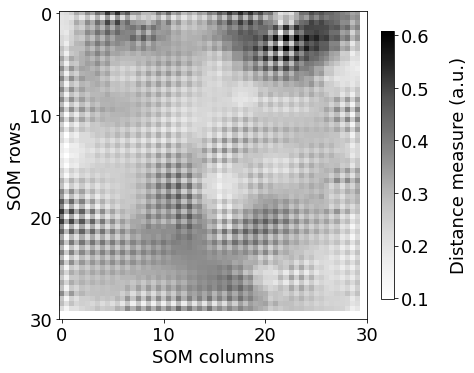

In [593]:
u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, 30, 30)
plt.show()

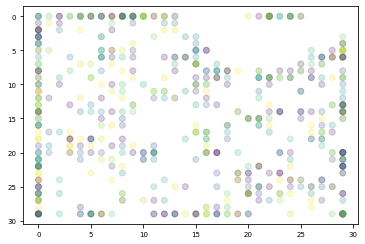

In [594]:
clusters = som.get_clusters(X)
plt.scatter(x=[c[1] for c in clusters], y=[c[0] for c in clusters], c=y, alpha=0.2)
plt.gca().invert_yaxis()
plt.show()

In [619]:
plot_som_histogram()

TypeError: 'list' object is not callable

[array([25,  0]),
 array([18,  5]),
 array([27, 21]),
 array([23, 22]),
 array([ 0, 12]),
 array([29, 29]),
 array([ 0, 22]),
 array([25, 28]),
 array([ 8, 26]),
 array([26, 20]),
 array([20, 24]),
 array([0, 4]),
 array([26, 20]),
 array([25,  0]),
 array([10,  2]),
 array([26, 20]),
 array([ 0, 25]),
 array([20, 23]),
 array([6, 6]),
 array([24, 19]),
 array([22,  0]),
 array([20,  3]),
 array([28,  4]),
 array([29, 29]),
 array([ 9, 22]),
 array([10, 27]),
 array([0, 9]),
 array([ 5, 28]),
 array([8, 0]),
 array([20, 17]),
 array([29, 29]),
 array([14,  6]),
 array([14, 23]),
 array([23,  8]),
 array([ 6, 29]),
 array([14,  0]),
 array([ 0, 24]),
 array([ 6, 26]),
 array([29, 11]),
 array([17, 27]),
 array([ 9, 27]),
 array([4, 0]),
 array([27, 29]),
 array([5, 6]),
 array([ 7, 15]),
 array([21, 24]),
 array([5, 6]),
 array([20,  4]),
 array([ 9, 24]),
 array([25, 20]),
 array([29, 20]),
 array([ 8, 16]),
 array([14,  4]),
 array([18, 14]),
 array([17,  2]),
 array([22, 21]),
 array

(array([[22., 13.,  9.,  4., 17.,  6., 11., 20.,  7., 16.],
        [ 7.,  8.,  8.,  4.,  6.,  4.,  1.,  6.,  1., 11.],
        [12.,  6.,  3.,  6.,  5.,  6.,  3.,  3.,  8.,  5.],
        [ 8.,  5.,  2.,  1.,  7.,  1.,  3.,  6.,  7.,  4.],
        [23.,  0.,  4.,  2.,  4.,  7.,  2.,  0.,  4.,  7.],
        [28.,  4.,  7.,  0.,  1.,  1.,  5.,  5.,  5., 23.],
        [18.,  6.,  6.,  3.,  7.,  1.,  4.,  3.,  1.,  8.],
        [ 0.,  0.,  7.,  4.,  2.,  3.,  4.,  3.,  3.,  8.],
        [ 0.,  0.,  1.,  3.,  2.,  3.,  6.,  6.,  3., 10.],
        [24.,  0.,  0.,  4., 17., 17., 12.,  5.,  1., 31.]]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <matplotlib.collections.QuadMesh at 0x7fe79a49e0b8>)

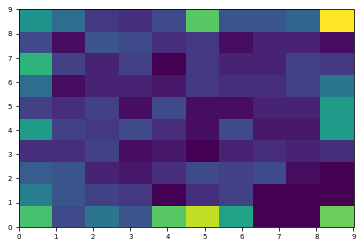

In [623]:
import susi
import matplotlib.pyplot as plt
som = susi.SOMClustering()
som.fit(X)
bmu_list = som.get_bmus(X)
plt.hist2d([x[0] for x in bmu_list], [x[1] for x in bmu_list])


In [627]:
som.get_datapoints_from_node([9,9])

[0,
 13,
 62,
 66,
 88,
 111,
 124,
 136,
 207,
 231,
 263,
 281,
 284,
 333,
 358,
 371,
 376,
 377,
 390,
 395,
 451,
 462,
 478,
 510,
 519,
 533,
 559,
 569,
 601,
 628,
 643]

In [625]:
clusters = som.get_clusters(X)
clusters_df = pd.DataFrame(clusters)
clusters_df

0  1
0    9  9
1    9  4
2    5  0
3    6  0
4    8  3
..  .. ..
645  8  8
646  4  0
647  0  8
648  7  3
649  3  7

[650 rows x 2 columns]

In [628]:
som.transform(X)
som.get_datapoints_from_node([9,9])

[0,
 13,
 62,
 66,
 88,
 111,
 124,
 136,
 207,
 231,
 263,
 281,
 284,
 333,
 358,
 371,
 376,
 377,
 390,
 395,
 451,
 462,
 478,
 510,
 519,
 533,
 559,
 569,
 601,
 628,
 643]